In [5]:
#necessary package import
#Numpy
import numpy as np
from numpy.linalg import multi_dot
from math import factorial, tanh
#Matplotlib
import matplotlib.pyplot as plt
#Scipy
from scipy.linalg import block_diag
#Thewalrus
from thewalrus import perm
#Strawberryfields
import strawberryfields as sf
from strawberryfields.ops import *
#import mplhep as hep
#Qutip
from qutip import *

In [43]:
#Setting Variables
#Rotation gates
R1 = np.pi/4
R2 = np.pi/4
R3 = np.pi/4
R4 = np.pi/4
R5 = np.pi/4
R6 = np.pi/4
R7 = np.pi/4
R8 = np.pi/4

#Beamsplitters
BT1 = np.pi/4;  BP1 = np.pi/2
BT2 = np.pi/4;  BP2 = np.pi/2
BT3 = np.pi/4;  BP3 = np.pi/2
BT4 = np.pi/4;  BP4 = np.pi/2
BT5 = np.pi/4;  BP5 = np.pi/2
BT6 = np.pi/4;  BP6 = np.pi/2
BT7 = np.pi/4;  BP7 = np.pi/2
BT8 = np.pi/4;  BP8 = np.pi/2
BT9 = np.pi/4;  BP9 = np.pi/2
BT10 = np.pi/4; BP10 = np.pi/2
BT11 = np.pi/4; BP11 = np.pi/2
BT12 = np.pi/4; BP12 = np.pi/2
BT13 = np.pi/4; BP13 = np.pi/2
BT14 = np.pi/4; BP14 = np.pi/2
BT15 = np.pi/4; BP15 = np.pi/2
BT16 = np.pi/4; BP16 = np.pi/2
BT17 = np.pi/4; BP17 = np.pi/2
BT18 = np.pi/4; BP18 = np.pi/2

In [44]:
#Rotation gate calculation
Uphase = np.diag([np.exp(R1*1j),np.exp(R2*1j),np.exp(R3*1j),np.exp(R4*1j),
                  np.exp(R5*1j),np.exp(R6*1j),np.exp(R7*1j),np.exp(R8*1j)])

In [95]:
#Beamsplitter calculation
#Put variables
BSargs = [(BT1, BP1),(BT2, BP2),(BT3, BP3),(BT4, BP4),
          (BT5, BP5),(BT6, BP6),(BT7, BP7),
          (BT8, BP8),(BT9, BP9),(BT10, BP10),(BT11, BP11),
          (BT12, BP12),(BT13, BP13),(BT14, BP14),
          (BT15, BP15),(BT16, BP16),(BT17, BP17),(BT18, BP18)]

t_r_amplitudes = [(np.cos(q), np.exp(p*1j)*np.sin(q)) for q,p in BSargs]

BSunitaries = [np.array([[t, -np.conj(r)], [r, t]]) for t,r in t_r_amplitudes]

UBS1 = block_diag(*BSunitaries[0:4])
UBS2 = block_diag([[1]], BSunitaries[4], BSunitaries[5], BSunitaries[6], [[1]])
UBS3 = block_diag(*BSunitaries[7:11])
UBS4 = block_diag([[1]], BSunitaries[11], BSunitaries[12], BSunitaries[13], [[1]])
UBS5 = block_diag(*BSunitaries[14:18])

In [96]:
U = multi_dot([UBS5, UBS4, UBS3, UBS2, UBS1, Uphase])
print(np.round(U,4))

[[-0.1036-0.1036j -0.25  +0.25j   -0.3018-0.3018j  0.5518-0.5518j
   0.125 +0.125j  -0.125 +0.125j   0.    +0.j      0.    +0.j    ]
 [-0.25  +0.25j   -0.6036-0.6036j  0.0518-0.0518j -0.1982-0.1982j
   0.125 -0.125j   0.125 +0.125j   0.    +0.j      0.    +0.j    ]
 [-0.3018-0.3018j  0.0518-0.0518j -0.25  -0.25j   -0.    +0.j
  -0.25  -0.25j    0.5   -0.5j     0.125 +0.125j  -0.125 +0.125j ]
 [ 0.5518-0.5518j -0.1982-0.1982j -0.    +0.j     -0.25  -0.25j
  -0.    +0.j     -0.25  -0.25j    0.125 -0.125j   0.125 +0.125j ]
 [ 0.125 +0.125j   0.125 -0.125j  -0.25  -0.25j   -0.    +0.j
  -0.25  -0.25j   -0.    +0.j     -0.1982-0.1982j  0.5518-0.5518j]
 [-0.125 +0.125j   0.125 +0.125j   0.5   -0.5j    -0.25  -0.25j
  -0.    +0.j     -0.25  -0.25j    0.0518-0.0518j -0.3018-0.3018j]
 [ 0.    +0.j      0.    +0.j      0.125 +0.125j   0.125 -0.125j
  -0.1982-0.1982j  0.0518-0.0518j -0.6036-0.6036j -0.25  +0.25j  ]
 [ 0.    +0.j      0.    +0.j     -0.125 +0.125j   0.125 +0.125j
   0.5518-0.5518j

In [101]:
input = [0, 0, 0, 1, 1, 0, 0, 0]
n = 2
# Calculating the probability for each state in measure_states
measure_states = [[q1, q2, q3, q4, q5, q6, q7, q8] 
                  for q8 in range(n+1) for q7 in range(n+1) for q6 in range(n+1) for q5 in range(n+1) 
                  for q4 in range(n+1) for q3 in range(n+1) for q2 in range(n+1) for q1 in range(n+1) 
                  if q1 + q2 + q3 + q4 + q5 + q6 + q7 + q8 == n]

In [102]:
def unitary_mapping(output):
    # The two lines below are the extracted row and column indices.
    list_rows = sum([[i] * output[i] for i in range(len(output))],[])
    list_columns = sum([[i] * input[i] for i in range(len(input))],[])
    Umap = U[:,list_columns][list_rows,:]
    return Umap

def probs_theory(output):
    perm_squared = np.abs(perm(unitary_mapping(output), method="ryser"))**2
    denominator = np.prod([factorial(inp) for inp in input]) * np.prod([factorial(out) for out in output])
    return perm_squared / denominator

In [103]:
#Comparing Theory and Simulation
# Initialize the total probability
total_probability_T = 0  

# measure_states의 각 상태에 대해 확률을 출력
for i, state in enumerate(measure_states):
    # 각 상태의 확률을 출력
    # *state는 state 리스트의 요소들을 개별 인자로 전달합니다.
    print(f"Probability of state(Theory)     {state}: {probs_theory(state)*100}%")
    total_probability_T += probs_theory(state)
    
# Print the total probability
print(f"Total probability(Theory):     {total_probability_T*100}%")

Probability of state(Theory)     [2, 0, 0, 0, 0, 0, 0, 0]: 3.8057190184059673%
Probability of state(Theory)     [1, 1, 0, 0, 0, 0, 0, 0]: 3.5156249999999987%
Probability of state(Theory)     [0, 2, 0, 0, 0, 0, 0, 0]: 0.4911559815940293%
Probability of state(Theory)     [1, 0, 1, 0, 0, 0, 0, 0]: 7.611438036811948%
Probability of state(Theory)     [0, 1, 1, 0, 0, 0, 0, 0]: 0.9823119631880605%
Probability of state(Theory)     [0, 0, 2, 0, 0, 0, 0, 0]: 1.0629340867460556e-30%
Probability of state(Theory)     [1, 0, 0, 1, 0, 0, 0, 0]: 0.3906249999999986%
Probability of state(Theory)     [0, 1, 0, 1, 0, 0, 0, 0]: 0.3906249999999995%
Probability of state(Theory)     [0, 0, 1, 1, 0, 0, 0, 0]: 1.5625000000000007%
Probability of state(Theory)     [0, 0, 0, 2, 0, 0, 0, 0]: 3.7861594342216036e-31%
Probability of state(Theory)     [1, 0, 0, 0, 1, 0, 0, 0]: 7.611438036811938%
Probability of state(Theory)     [0, 1, 0, 0, 1, 0, 0, 0]: 0.9823119631880598%
Probability of state(Theory)     [0, 0, 1, 0, 

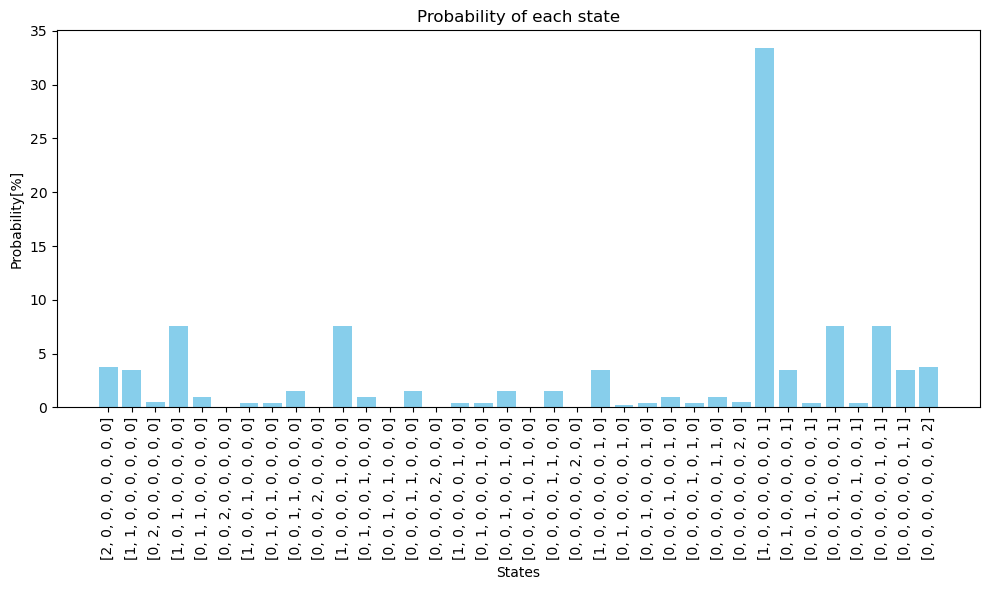

In [104]:
#Probaibility
state_probs = [probs_theory(state)*100 for state in measure_states]

# Creating labels for the states
state_labels = [str(state) for state in measure_states]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(state_labels, state_probs, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Probability[%]")
#plt.yscale('log')
plt.title("Probability of each state")
plt.tight_layout()

#이미지를 경로에 저장. 확장자는 .pdf, .png, .jpeg등 가능
#plt.savefig('/Users/jaewonlee/Lab/PQC/BS_Q_4(log).png', transparent = True)

# Showing the plot
plt.show()